# Linear Regression

#### References
https://enlight.nyc/projects/linear-regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2

%load_ext autoreload
%autoreload 2

In [2]:
x_values = np.arange(200)
y_values = np.arange(200)
noise = np.random.normal(0, 30, y_values.shape)
y_values = y_values + noise

### Roll your own

In [3]:
def best_fit_line(x_values,y_values):
    m = (((x_values.mean() * y_values.mean()) - (x_values * y_values).mean() ) /
         ( (x_values.mean()) ** 2 - (x_values ** 2 ).mean() ))

    b = y_values.mean() - m * x_values.mean()

    return m, b

In [4]:
m, b  = best_fit_line(x_values, y_values)

In [5]:
print(f"regression line: y = {round(m,2)}x + {round(b,2)}")

regression line: y = 0.98x + 5.35


In [6]:
x_prediction = 250
y_prediction = (m * x_prediction)+b
print(f"predicted coordinate: ({round(x_prediction,2)}, {round(y_prediction,2)})")


predicted coordinate: (250, 250.03)


Even though we have a linear model, it's not possible for it to be 100% accurate as we have a lot of variation in our data. The line of best fit simply finds the best representation of all the data points. The r^2 value, or coefficient of determination, allows us to numerically represent how good our linear model actually is. The closer the value is to one, the better the fit of the regression line. If the r^2 value is one, the model explains all the variability of the data.

In this equation, we are dividing the square error of the regression line (sum of distances between regression line y values and original data y values squared) by the square error of the y mean line (sum of distances between y mean line y values and original data y values squared) and subtracting that value from one. The y mean line is a horizontal line at the mean of all the original y values. For example, if mean of the y_values was 5, the line would be at y = 5. In addition, the reason we square errors is to normalize the error values to be positive and punish for outliers (data points that do not follow the linear correlation).

In [7]:
# y values of regression line
regression_line = [(m*x)+b for x in x_values]

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig)) # helper function to return the sum of the distances between the two y values squared

def r_squared_value(ys_orig,ys_line):
    squared_error_regr = squared_error(ys_orig, ys_line) # squared error of regression line
    y_mean_line = [np.mean(ys_orig) for y in ys_orig] # horizontal line (mean of y values)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line) # squared error of the y mean line
    return 1 - (squared_error_regr/squared_error_y_mean)

r_squared = r_squared_value(y_values, regression_line)
print(f"r^2 value: {round(r_squared,2)}")

r^2 value: 0.8


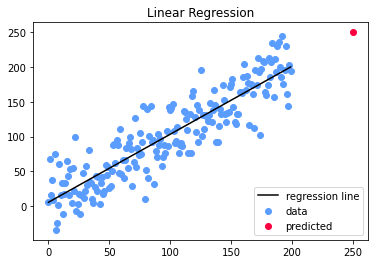

In [8]:

plt.title('Linear Regression')
plt.scatter(x_values, y_values,color='#5b9dff',label='data')
plt.scatter(x_prediction, y_prediction, color='#fc003f', label="predicted")
plt.plot(x_values, regression_line, color='000000', label='regression line')
plt.legend(loc=4)

### Use Sklearn
Using Sklearn, we can have a more robust model, with a lot of the hard work done already.
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Coefficients: 
 [[0.91789189]]
Intercept: 
 [8.85637157]
Mean squared error: 1069.03
Coefficient of determination: -0.06


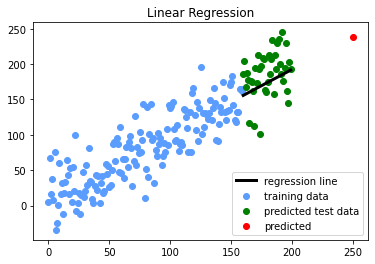

In [9]:
x_values = x_values.reshape(-1, 1)
y_values = y_values.reshape(-1, 1)

x_values_train = x_values[:-40]
x_values_test = x_values[-40:]

# Split the targets into training/testing sets
y_values_train = y_values[:-40]
y_values_test = y_values[-40:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_values_train, y_values_train)

# Make predictions using the testing set
y_pred = regr.predict(x_values_test)

# Make "actual" prediction
pred_value =250
y_pred_actual = regr.predict(np.array([pred_value]).reshape(-1,1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_values_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_values_test, y_pred))

plt.title('Linear Regression')
plt.scatter(x_values_train, y_values_train,  color='#5b9dff', label="training data")
plt.scatter(x_values_test, y_values_test,  color='green', label="predicted test data")
plt.plot(x_values_test, y_pred, color='000000', linewidth=3, label = "regression line")
plt.scatter(pred_value, y_pred_actual,  color='red', label="predicted")
plt.legend(loc=4)
plt.show()

What about getting p-values? Unfortunately sklearn doesn't do this very well, for this, we need to use a new library

In [10]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
import statsmodels.api as sm
x_values_train = sm.add_constant(x_values_train)
model = sm.OLS(y_values_train, x_values_train)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     372.1
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.21e-43
Time:                        21:33:40   Log-Likelihood:                -758.02
No. Observations:                 160   AIC:                             1520.
Df Residuals:                     158   BIC:                             1526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8564      4.375      2.024      0.0

# Logistic Regression

https://enlight.nyc/projects/build-a-logistic-regression-model 

Let's examine the probability of the home team winning a soccer game.

$\theta(x) = \frac{1}{1+e^{-x}}$

In [11]:
import numpy as np
import pandas as pd
import math

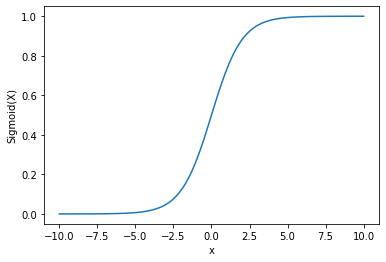

In [12]:
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.show()

## A toy example first

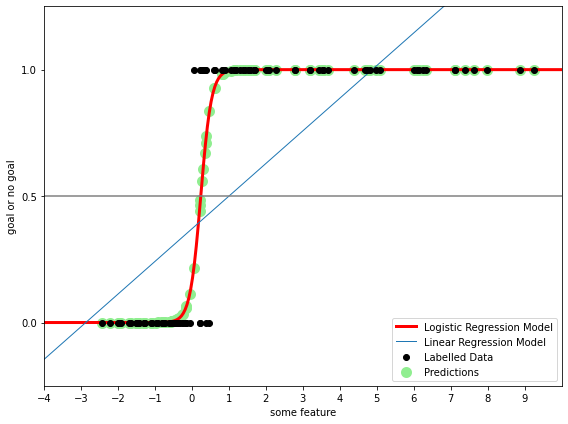

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]


# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20,label="Labelled Data")
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3,label="Logistic Regression Model")

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1,label="Linear Regression Model")
plt.axhline(.5, color='.5')

predictions = (clf.predict_proba(X))
predictions
predictions = predictions[:,1] 
plt.scatter(X, predictions, color='lightgreen', linewidth=5,label="Predictions")

plt.ylabel('goal or no goal')
plt.xlabel('some feature')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend()

plt.tight_layout()
plt.show()

### With a real dataset

Use the premier league dataset, `pl_league.csv`: Source: https://github.com/SahilS1203/enlightLR/tree/master/data

In [14]:
data = pd.read_csv('data/pl_dataset.csv')

In [15]:
data

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2000-08-19,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0
1,1,2000-08-19,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-4.0
2,2,2000-08-19,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2.0
3,3,2000-08-19,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.0
4,4,2000-08-19,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,7595,2020-07-26,Leicester,Man United,0,2,NH,67,64,39,...,0,0,0,0,0,0.736842,0.736842,-0.026316,-0.105263,3.0
7596,7596,2020-07-26,Man City,Norwich,5,0,H,97,26,35,...,0,0,0,1,1,1.631579,-1.157895,1.500000,0.315789,-17.0
7597,7597,2020-07-26,Newcastle,Liverpool,1,3,NH,37,82,55,...,0,0,0,0,0,-0.473684,1.315789,-1.368421,-0.210526,11.0
7598,7598,2020-07-26,Southampton,Sheffield United,3,1,H,48,38,59,...,0,0,0,0,0,-0.289474,0.052632,-0.131579,0.052632,-2.0


In [16]:
data_MW = data[data.MW > 3] #Ensures that games from the first three matchweeks are removed

In [17]:
data_MW

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
30,30,2000-09-05,Man United,Bradford,6,0,H,5,2,3,...,0,0,0,0,0,0.500000,0.250000,0.250000,0.250000,-16.0
31,31,2000-09-05,Sunderland,West Ham,1,1,NH,3,4,5,...,0,0,0,0,0,-0.500000,-0.750000,0.500000,0.500000,-2.0
32,32,2000-09-05,Tottenham,Everton,3,2,H,4,5,4,...,0,0,0,0,0,0.000000,0.250000,0.000000,0.000000,-3.0
33,33,2000-09-06,Charlton,Southampton,1,1,NH,7,6,8,...,0,0,0,0,0,-0.250000,-0.250000,0.250000,0.250000,3.0
34,34,2000-09-06,Chelsea,Arsenal,2,2,NH,5,7,5,...,0,0,0,0,0,0.000000,0.750000,-0.500000,-0.500000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,7595,2020-07-26,Leicester,Man United,0,2,NH,67,64,39,...,0,0,0,0,0,0.736842,0.736842,-0.026316,-0.105263,3.0
7596,7596,2020-07-26,Man City,Norwich,5,0,H,97,26,35,...,0,0,0,1,1,1.631579,-1.157895,1.500000,0.315789,-17.0
7597,7597,2020-07-26,Newcastle,Liverpool,1,3,NH,37,82,55,...,0,0,0,0,0,-0.473684,1.315789,-1.368421,-0.210526,11.0
7598,7598,2020-07-26,Southampton,Sheffield United,3,1,H,48,38,59,...,0,0,0,0,0,-0.289474,0.052632,-0.131579,0.052632,-2.0


In [18]:
data_MW.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)

/Users/Josh/Work/Concordia/MAST397/fall_2021/code/SportsAnalyticsConcordia/env/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
data_MW

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
30,H,1.250000,1.000000,D,D,W,D,W,L,0.500000,0.250000,0.250000,-16.0
31,NH,0.750000,0.250000,L,L,W,D,L,L,-0.500000,-0.750000,0.500000,-2.0
32,H,1.000000,1.000000,L,D,W,D,W,L,0.000000,0.250000,0.000000,-3.0
33,NH,0.750000,0.500000,L,L,W,D,L,D,-0.250000,-0.250000,0.250000,3.0
34,NH,1.000000,1.500000,D,L,W,W,W,L,0.000000,0.750000,-0.500000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,NH,1.631579,1.657895,L,W,L,D,W,D,0.736842,0.736842,-0.105263,3.0
7596,H,2.052632,0.552632,W,W,W,L,L,L,1.631579,-1.157895,0.315789,-17.0
7597,NH,1.157895,2.526316,D,L,L,W,L,D,-0.473684,1.315789,-0.210526,11.0
7598,H,1.289474,1.421053,W,D,D,L,L,W,-0.289474,0.052632,0.052632,-2.0


FTR is the full-time result, which is either H for Home win or NH for Not Home win, which is either a draw or a loss for the home team. HTP is the home team average points, which aggregates the number of points and divides it by the matchweek. ATP works similarly to HTP but is the away team average points. HM1 is home match 1, which gives the result of the most recent game for the home team. This is similar to HM2, and HM3, which provides the 2nd most recent match and 3rd most recent match. AM1, AM2, and AM3 are the results of the away team. HTGD is the average goal difference for the home team, which calculates an average similar to how HTP works. ATGD is the average goal difference for the away team. DiffFormPts is the average difference in points between the two teams from the 5 last matches. DiffLP is the difference in the team's respective league positions from the previous football season.

### Data Exploration

In [20]:
no_of_matches = len(data.index)

In [21]:
no_of_homewins = len(data[data.FTR == 'H'])

In [22]:
win_pct = (no_of_homewins/no_of_matches) * 100

In [23]:
print ("Number of matches: "+ str(no_of_matches)) #have to use str as integers and strings cannot be concatenated 
print ("Number of home victories: "+ str(no_of_homewins))
print ("Win Percentage: "+ str(round(win_pct,2))+"%") #round to 2dp


Number of matches: 7600
Number of home victories: 3529
Win Percentage: 46.43%


This means that the home team either drew or lost approximately 53.6% of their matches. This suggests that we can't just pick a winner based on if a team is playing at their home stadium.

Explore some correlations within the data

<AxesSubplot:>

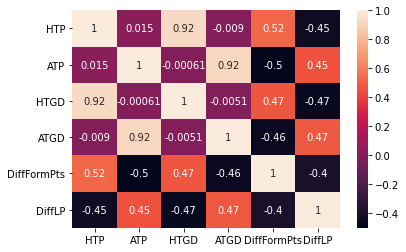

In [24]:
import seaborn as sns
sns.heatmap(data_MW.corr(), annot=True) #here we use data because it only includes the necessary features

### Data Prep

In [25]:
x_features = data_MW.drop(['FTR'],axis=1) #remove FTR, where the ,1 indicates a column
y_target = data_MW['FTR'] #creates a variable with one column with all the full time results

In [26]:
y_target_binary = y_target.replace("H",1).replace("NH",0)
 

In [27]:
y_target_binary

30      1
31      0
32      1
33      0
34      0
       ..
7595    0
7596    1
7597    0
7598    1
7599    0
Name: FTR, Length: 7000, dtype: int64

In [28]:
from sklearn.preprocessing import scale #used to standardize data
columns = [['HTP','ATP','HTGD','ATGD','DiffFormPts','DiffLP']]
for column in columns:
    x_features[column] = scale(x_features[column])

Convert categorical variabeles into numberical values

In [29]:
plDF = pd.DataFrame(index = x_features.index) #sets the index - rows from 30 onwards.

This creates a dataframe without any column data but rather the rows included in the dataframe. After this, we use the .join method to join the column data to the specific rows.

Then, we iterate through each feature and check if each feature is categorical. If categorical, it needs to be converted into a continuous variable (indicators).

In [30]:
for column, column_data in x_features.iteritems(): #iteritems iterates through each column

    if column_data.dtype == object: ## an object is not an integer
            column_data = pd.get_dummies(column_data, prefix = column) #converts into indicator 
            
    plDF = plDF.join(column_data) #joins each column and puts it on dataframe

x_features = plDF #x_features is updated now


In [31]:
print ("Number of features: "+str(len(x_features.columns)))
print (list(plDF.columns))
x_features

Number of features: 24
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
30,-0.046305,-0.597459,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0.720545,0.339394,0.722075,-1.989112
31,-1.089006,-2.170778,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,-0.701305,-1.085232,1.408757,-0.248297
32,-0.567655,-0.597459,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0.009620,0.339394,0.035394,-0.372641
33,-1.089006,-1.646338,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,-0.345843,-0.372919,0.722075,0.373423
34,-0.567655,0.451421,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0.009620,1.051708,-1.337969,0.373423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,0.749442,0.782646,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,1.057299,1.032963,-0.253735,0.373423
7596,1.627506,-1.535930,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,2.329481,-1.666330,0.902781,-2.113456
7597,-0.238381,2.604384,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,-0.663888,1.857747,-0.542864,1.368174
7598,0.036014,0.285808,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,-0.401968,0.058218,0.179958,-0.248297


In [32]:
from sklearn.model_selection import train_test_split #required for splitting data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 700,stratify = y_target)

In [33]:
from sklearn.metrics import f1_score #used to evaluate the accuracy of a model

Now you may be wondering why do we use the F1 score? The F1 score is an alternative method of predicting the success of a model. It is useful as it investigates false positives and false negatives. In specific real-life scenarios, such as diagnosing cancer, where the distribution of results is unequal, using an F1 score is a more accurate way of judging the performance of a model.

In [34]:
def label_predict(model, features, target):
   # Makes predictions using Logistic Regression based on accuracy metrics and the F1 score.
    y_prediction = model.predict(features)
    acc = sum(target == y_prediction) / float(len(y_prediction))
    return f1_score(target, y_prediction, pos_label='H'), acc

In [35]:
def train_predictions(model, x_train, y_train, x_test, y_test):
    # Train the Logistic Regression model
    model.fit(x_train, y_train)
    
   #Outputs metrics for training dataset
    f1, acc = label_predict(model, x_train, y_train)
    print("TRAINING")
    print ("F1 = "+str(round(f1,2)))
    print ("Accuracy = "+str(round(acc,2)))
   #Outputs metrics for testing dataset
    f1, acc = label_predict(model, x_test, y_test)
    print("TESTING")
    print ("F1 = "+str(round(f1,2)))
    print ("Accuracy = "+str(round(acc,2)))
    
    return model

In [36]:
from sklearn.linear_model import LogisticRegression #used to carry out Logistic Regression
LR = LogisticRegression(random_state = 4) 
#creates a LR model. random state is used to shuffle the data

lr_model = train_predictions(LR, x_train, y_train, x_test, y_test)
#finally we call the method we created with the Logistic Regression model


TRAINING
F1 = 0.62
Accuracy = 0.66
TESTING
F1 = 0.66
Accuracy = 0.71


In [37]:
y_train

1774     H
6678    NH
6444    NH
5430    NH
7069    NH
        ..
3766     H
6145    NH
5284    NH
6184    NH
5734     H
Name: FTR, Length: 6300, dtype: object

In [38]:
lr_model.predict(x_test)

array(['NH', 'H', 'H', 'H', 'H', 'H', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH',
       'H', 'H', 'H', 'NH', 'NH', 'H', 'NH', 'H', 'H', 'NH', 'NH', 'NH',
       'NH', 'NH', 'NH', 'NH', 'H', 'NH', 'H', 'NH', 'NH', 'NH', 'H', 'H',
       'H', 'NH', 'H', 'NH', 'H', 'NH', 'NH', 'NH', 'NH', 'H', 'NH', 'H',
       'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'H', 'NH', 'NH', 'H', 'NH',
       'NH', 'NH', 'NH', 'H', 'NH', 'NH', 'NH', 'NH', 'NH', 'H', 'NH',
       'H', 'NH', 'NH', 'H', 'NH', 'H', 'H', 'H', 'NH', 'NH', 'NH', 'NH',
       'H', 'NH', 'H', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'H', 'NH',
       'NH', 'NH', 'NH', 'H', 'NH', 'NH', 'H', 'NH', 'NH', 'NH', 'H', 'H',
       'NH', 'NH', 'NH', 'NH', 'H', 'H', 'NH', 'NH', 'NH', 'NH', 'NH',
       'H', 'H', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'H', 'NH',
       'NH', 'H', 'NH', 'NH', 'H', 'NH', 'NH', 'H', 'NH', 'NH', 'H', 'NH',
       'NH', 'H', 'NH', 'NH', 'H', 'NH', 'H', 'NH', 'NH', 'NH', 'NH',
       'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'N

In [39]:
lr_model.predict_proba(x_test)

array([[0.24816909, 0.75183091],
       [0.58814357, 0.41185643],
       [0.69431395, 0.30568605],
       ...,
       [0.37487806, 0.62512194],
       [0.17833592, 0.82166408],
       [0.39500115, 0.60499885]])

In [40]:
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

y_train = y_train.astype("category")
mod_prob = OrderedModel(y_train,x_train[['HTP', 'ATP', 'HTGD', 'ATGD', 
                                         'DiffFormPts', 'DiffLP']],
                        distr='logit')
res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

/Users/Josh/Work/Concordia/MAST397/fall_2021/code/SportsAnalyticsConcordia/env/lib/python3.8/site-packages/statsmodels/miscmodels/ordinal_model.py:206: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 0.626978
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    FTR   Log-Likelihood:                -3950.0
Model:                   OrderedModel   AIC:                             7914.
Method:            Maximum Likelihood   BIC:                             7961.
Date:                Thu, 06 Oct 2022                                         
Time:                        21:33:42                                         
No. Observations:                6300                                         
Df Residuals:                    6293                                         
Df Model:                           7                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
HTP            -0.0643      0.077     -0.832      0.405      -0.216       0.087
ATP             0.0637      0.077      0.828      0.408      -0.087       0.214
HTGD           -0.3189      0.074     -4.296      0.000      -0.464      -0.173
ATGD            0.2585      0.074      3.515      0.000       0.114       0.403
DiffFormPts    -0.0347      0.042     -0.828      0.408      -0.117       0.047
DiffLP          0.3376      0.036      9.318      0.000       0.267       0.409
H/NH           -0.1575      0.027     -5.826      0.000      -0.210      -0.104
===============================================================================
"""

Another way to do the above it to use the "formula" mechanism:
https://www.statsmodels.org/dev/examples/notebooks/generated/ordinal_regression.html

In [41]:
y_target_binary = y_target.replace("H",1).replace("NH",0)

dataset = pd.concat([x_train, y_target_binary],axis=1)

In [42]:
import statsmodels.api as sm
model = sm.GLM.from_formula("FTR ~ HTP + ATP + HTGD + ATGD+DiffFormPts+DiffLP", 
                            family=sm.families.Binomial(), data=dataset)
result = model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    FTR   No. Observations:                 6300
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3950.0
Date:                Thu, 06 Oct 2022   Deviance:                       7899.9
Time:                        21:33:42   Pearson chi2:                 6.29e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1201
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1575      0.027     -5.827      0.000      -0.210      -0.105
HTP             0.0643      0.077      0.832      0.406      -0.087       0.216
ATP            -0.0638      0.077     -0.829      0.407      -0.215       0.087
HTGD            0.3189      0.074      4.297      0.000       0.173       0.464
ATGD           -0.2584      0.074     -3.514      0.000      -0.403      -0.114
DiffFormPts     0.0347      0.042      0.828      0.408      -0.048       0.117
DiffLP         -0.3376      0.036     -9.318      0.000      -0.409      -0.267
===============================================================================
"""

In [43]:
# Extract the confidince intervals
result.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,-0.210435,-0.104500
HTP,-0.087235,0.215820
ATP,-0.214581,0.087028
HTGD,0.173434,0.464363
ATGD,-0.402513,-0.114254
DiffFormPts,-0.047503,0.116926
DiffLP,-0.408640,-0.266607
